In [1]:



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [3]:
def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", ra_stats = False, show_plot = True, x_coor= 1 , y_coor = 1, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,9)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(x_coor,y_coor, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [4]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
lscc = cptac.Lscc()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


In [5]:
prot_hnscc = hn.get_proteomics()
prot_gbm = g.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = col.get_proteomics()
prot_brca = b.get_proteomics()
prot_luad = l.get_proteomics()
prot_ovar = o.get_proteomics()
prot_ccrcc = c.get_proteomics()


In [21]:
prot_brca

prot_brca.columns = prot_brca.columns.droplevel(1)

filter_col = [col for col in prot_brca if col.startswith("F2")]
filter_col

['F2']

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


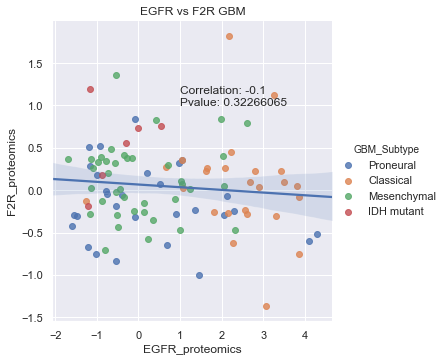

In [12]:
df1 = g.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["F2R","EGFR","SOX2","PLAU","PTPN6","SPRY2","C3"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = g.get_derived_molecular()
subtype = subtype[["rna_wang_cancer_cell_2017"]]

subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","F2R_proteomics", "GBM_Subtype",title = "EGFR vs F2R GBM", ra_stats = True, show_plot = True)

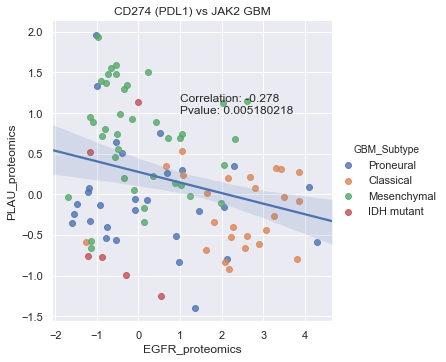

In [13]:
plot_lin_regression(merged,"EGFR_proteomics","PLAU_proteomics", "GBM_Subtype",title = "CD274 (PDL1) vs JAK2 GBM", ra_stats = True, show_plot = True)

In [9]:
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")

subtype = subtype.rename(columns={"case_id": "Patient_ID"})
subtype = subtype.set_index("Patient_ID")
subtype

,age,gender,country,smoking_history,smoke_age_start,smoke_age_stop,num_smoke_per_day,num_pack_years_sm,smoking_second_hand,smoking_inferred,...,tumor_pathology_review,ESTIMATE_stromal_score,ESTIMATE_immune_score,CD3_IHC_count,stemness_score,mutation_count,neoAntigen_count,chr_instability_idx,integrated_subtype,transcriptomic_subtype
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00977,56,Male,Russia,"Current reformed smoker, years unknown",NaN,NaN,20,NaN,Yes,strong_evidence,...,SCC 80%,6825.995755,7989.115925,1.0,0.953243,106,0,2.003654,Basal,Mesenchymal
C3L-00987,61,Male,Ukraine,Current smoker: Includes daily and non-daily s...,18,NaN,20,43.0,Yes,strong_evidence,...,SCC 90%;SCC 90%;SCC 80%;SCC 70%,5999.793467,4772.409716,0.0,0.825330,83,0,5.205612,CIN,Classical
C3L-00994,50,Male,Ukraine,Current reformed smoker within past 15 years,16,50,6,10.2,Exposure to secondhand smoke history not avail...,strong_evidence,...,SCC 40%;SCC 70%;SCC 40%;SCC 75%,8924.036564,8176.233903,5.0,0.664581,67,0,1.684475,Immune,Mesenchymal
C3L-00995,56,Male,Ukraine,"Current reformed smoker, more than 15 years",25,56,20,31.0,Exposure to secondhand smoke history not avail...,weak_evidence,...,SCC 90%;SCC 80%;SCC 40%;SCC 70%,8723.429667,8342.246345,70.0,0.539918,64,0,1.340483,Immune,Mesenchymal
C3L-00997,47,Male,Ukraine,"Current reformed smoker, more than 15 years",12,27,20,15.0,Yes,strong_evidence,...,SCC 70%;SCC 70%,7025.911695,7445.251991,60.0,0.843765,129,0,3.906370,CIN,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,72,Male,Poland,Current smoker: Includes daily and non-daily s...,25,NaN,10,23.5,No or minimal exposure to secondhand smoke,strong_evidence,...,SCC 75%,7772.142353,8589.873314,70.0,0.575173,112,1,1.445849,Immune,Mesenchymal
C3N-04278,71,Male,Poland,Current reformed smoker within past 15 years,30,68,15,28.5,No or minimal exposure to secondhand smoke,strong_evidence,...,PD 70%,6713.956510,7074.622965,90.0,0.831637,289,0,4.498365,CIN,Classical
C3N-04279,65,Male,Poland,Current smoker: Includes daily and non-daily s...,20,NaN,15,33.8,No or minimal exposure to secondhand smoke,strong_evidence,...,PDCa 70%,4913.198110,5469.762929,20.0,0.862529,183,0,5.766584,Basal,Classical


In [10]:
subtype = subtype[["integrated_subtype"]]
subtype

,integrated_subtype
Patient_ID,
C3L-00977,Basal
C3L-00987,CIN
C3L-00994,Immune
C3L-00995,Immune
C3L-00997,CIN
...,...
C3N-04277,Immune
C3N-04278,CIN
C3N-04279,Basal


cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: F2R, SPRY2 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 105 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


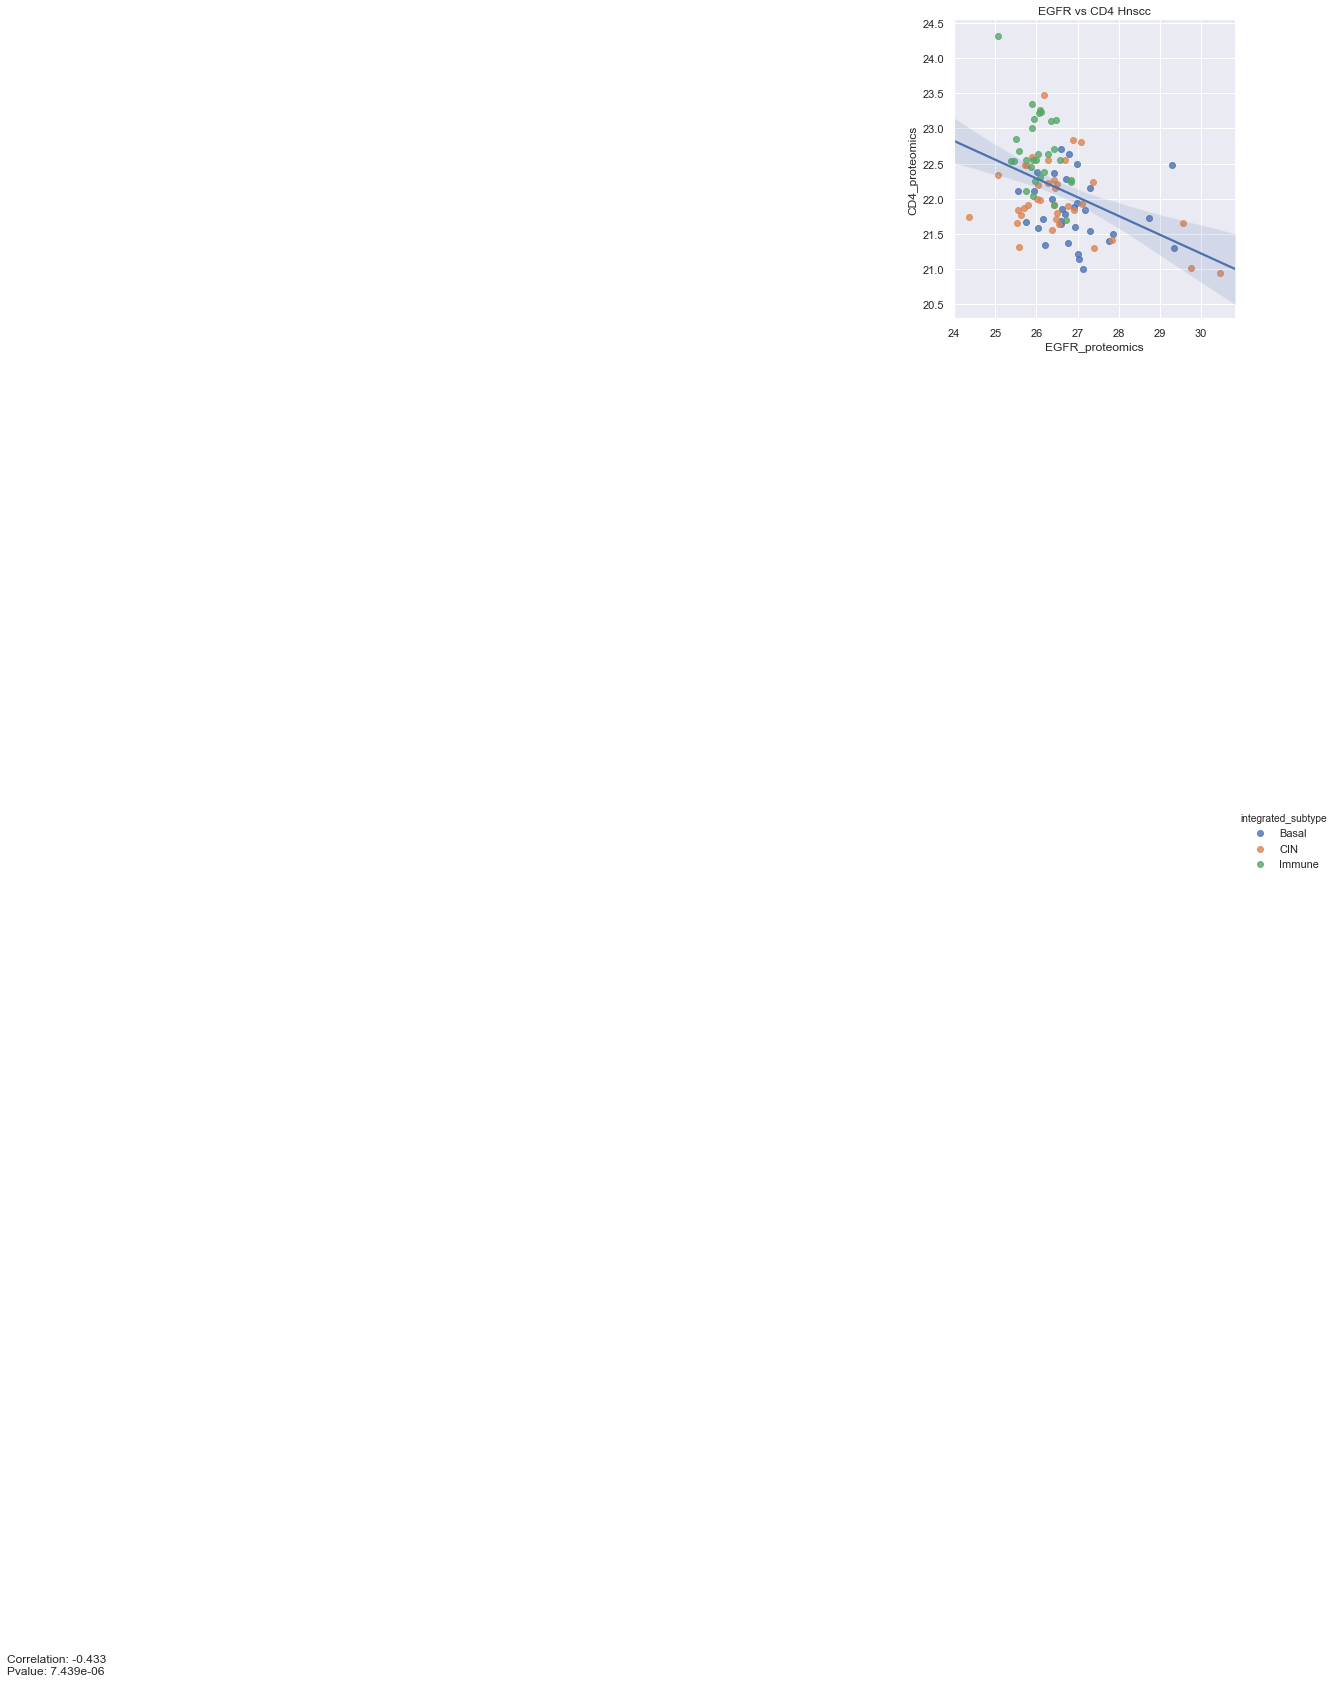

In [11]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["F2R","EGFR","CD4","PLAU","PTPN6","SPRY2","C3"], tissue_type="tumor")
#df1.columns = df1.columns.droplevel(1)


merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","CD4_proteomics", "integrated_subtype",title = "EGFR vs CD4 Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


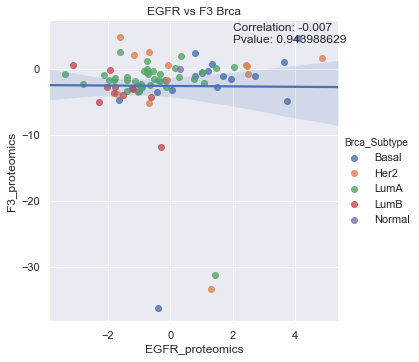

In [59]:
df1 = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","F3"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


#df1 = df1[((df1.F3_proteomics - df1.F3_proteomics.mean()) / df1.F3_proteomics.std()).abs() < 3] # remove outliers
subtype = b.get_clinical()
subtype = subtype[["PAM50"]]

subtype = subtype.rename(columns={"PAM50": "Brca_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","F3_proteomics", "Brca_Subtype",title = "EGFR vs F3 Brca", ra_stats = True, x_coor = 2, y_coor=4, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


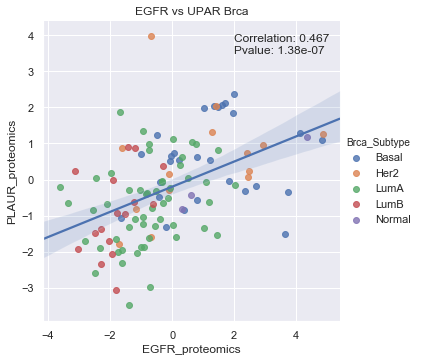

In [57]:
df1 = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PLAUR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]


#df1 = df1[((df1.F3_proteomics - df1.F3_proteomics.mean()) / df1.F3_proteomics.std()).abs() < 3] # remove outliers
subtype = b.get_clinical()
subtype = subtype[["PAM50"]]

subtype = subtype.rename(columns={"PAM50": "Brca_Subtype"})

merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","PLAUR_proteomics", "Brca_Subtype",title = "EGFR vs UPAR Brca", ra_stats = True, x_coor = 2, y_coor=3.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


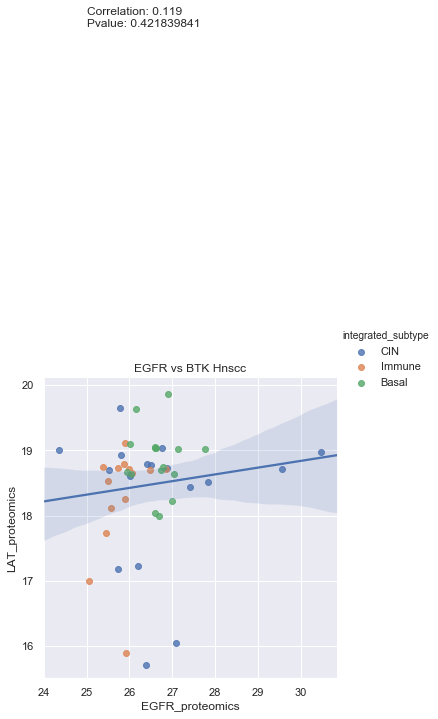

In [29]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BTK","EGFR","LAT"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")
subtype = subtype.set_index("case_id")
df1 = df1.join(subtype)

plot_lin_regression(df1,"EGFR_proteomics","LAT_proteomics", "integrated_subtype",title = "EGFR vs BTK Hnscc", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

In [33]:
 mut_type = hn.get_genotype_all_vars("JAK2")
  

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 108 samples for the JAK2 gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 204 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


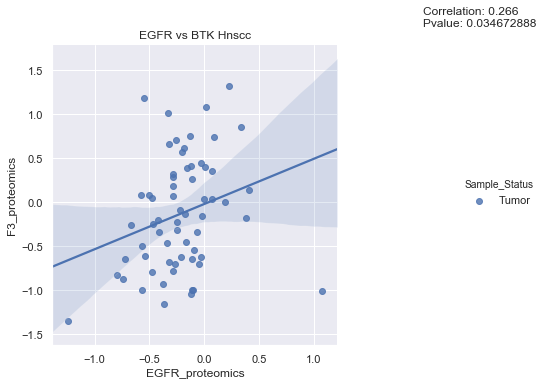

In [40]:
df1 = col.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BTK","EGFR","F3"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

#mut_type = hn.get_genotype_all_vars("JAK2")
#mut_type = mut_type.rename(columns={"Mutation": "JAK2_Mutation"})
#df1 = df1.join(mut_type)

df1 = df1[((df1.F3_proteomics - df1.F3_proteomics.mean()) / df1.F3_proteomics.std()).abs() < 3] # remove outliers
plot_lin_regression(df1,"EGFR_proteomics","F3_proteomics", "Sample_Status",title = "EGFR vs BTK Hnscc", ra_stats = True, x_coor = 2, y_coor=2, show_plot = True)

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CCL2, IL10 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


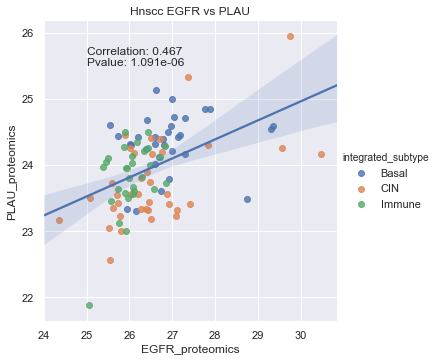

In [31]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CCL2","EGFR","CCL5","CXCL9","CXCL10","IL10","IL1B", "PLAU"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = pd.read_csv("~/Documents/Hnscc_Table_S1.csv")
subtype = subtype.set_index("case_id")
df1 = df1.join(subtype)

plot_lin_regression(df1,"EGFR_proteomics","PLAU_proteomics", "integrated_subtype",title = "Hnscc EGFR vs PLAU", ra_stats = True, x_coor = 25, y_coor=25.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


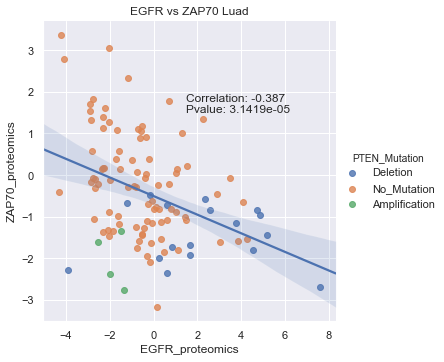

In [56]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["ZAP70","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = luad.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","ZAP70_proteomics", "PTEN_Mutation",title = "EGFR vs ZAP70 Luad", ra_stats = True, x_coor = 1.5, y_coor=1.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)


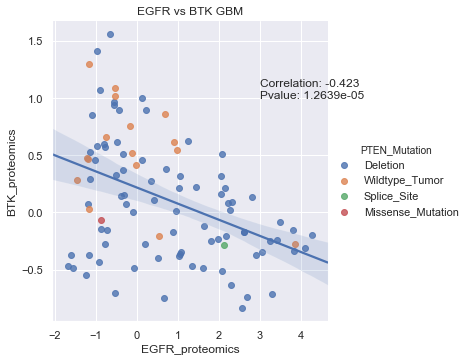

In [21]:
df1 = g.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BTK","EGFR"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = g.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","BTK_proteomics", "PTEN_Mutation",title = "EGFR vs BTK GBM", ra_stats = True, x_coor = 3, y_coor= 1, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


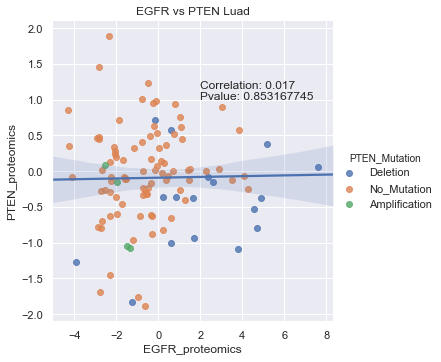

In [21]:
df1 = l.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","PTEN"])

df1 = df1.drop(df1.columns[2], axis=1)
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = l.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)
df1
#df1 = df1.loc[df1['JAK2_Mutation'] != "Deletion"]
plot_lin_regression(df1,"EGFR_proteomics","PTEN_proteomics", "PTEN_Mutation",title =  "EGFR vs PTEN Luad", ra_stats = True, x_coor = 2, y_coor=1, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 109 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)


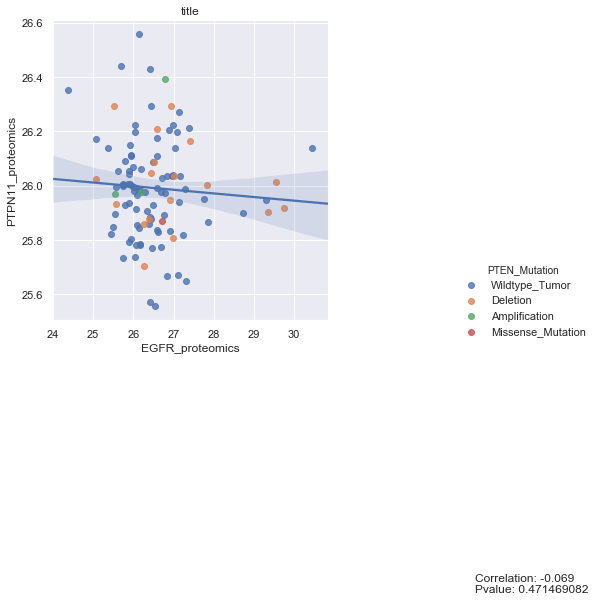

In [15]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["IL2RG","EGFR","PTEN","TGFB2","TGFB1","PTPN11"])
df1 = df1.loc[:,~df1.columns.duplicated()]
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
mut_type = hn.get_genotype_all_vars("PTEN")
mut_type = mut_type.rename(columns={"Mutation": "PTEN_Mutation"})
df1 = df1.join(mut_type)

plot_lin_regression(df1,"EGFR_proteomics","PTPN11_proteomics", "PTEN_Mutation",title = "title", ra_stats = True, x_coor = 34.5, y_coor=24.5, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 140 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


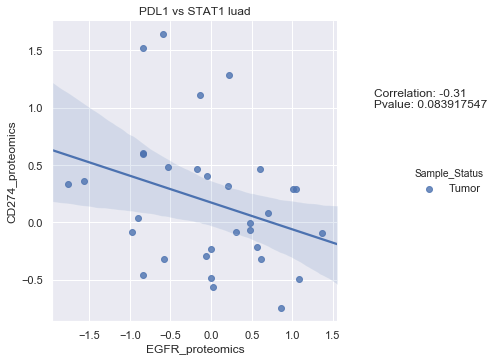

In [24]:
df1 = en.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR"])

#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

df1
#df1 = df1.loc[df1['JAK2_Mutation'] != "Deletion"]
plot_lin_regression(df1,"EGFR_proteomics","CD274_proteomics", "Sample_Status",title =  "PDL1 vs STAT1 luad", ra_stats = True, x_coor = 2, y_coor=1, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


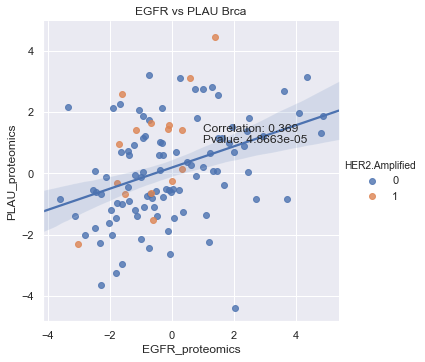

In [26]:
df1 = b.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["MMP9","EGFR","PLAU","PLAUR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = b.get_derived_molecular()
subtype = subtype[["HER2.Amplified"]]

#subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","PLAU_proteomics", "HER2.Amplified",title = "EGFR vs PLAU Brca", ra_stats = True, show_plot = True)

In [25]:
pd.set_option('display.max_columns', None)
subtype

Name,HER2.IHC.Score,HER2.FISH.Status,HER2.original,HER2.Amplified,HER2.refined,STARD3.ERBB2.GRB7.protein,HER2.class.Satpathy,HER2.status.Satpathy,PAM50.Her2.CNA,PAM50.Her2.HER2.status,CDH1.mutation,GATA3.mutation,MAP3K1.mutation,PIK3CA.mutation,PTEN.mutation,TP53.mutation,CDH1.mutation.status,GATA3.mutation.status,MAP3K1.mutation.status,PIK3CA.mutation.status,PTEN.mutation.status,TP53.mutation.status,Number.of.Mutations,Number.of.Mutated.Genes,Chromosome.INstability.index.CIN.,ESTIMATE.TumorPurity,ESTIMATE.ImmuneScore,ESTIMATE.StromalScore,xCell.ImmuneScore,xCell.StromaScore,Cibersort.Absolute.score,Stemness.Score
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CPT000814,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,,,Frame_Shift_Del,0,0,0,0,0,1,81,56,6.327184,0.819666,846.350897,-812.409581,0.0414,0.0000,0.565019,0.798050
CPT001846,NaN,NaN,negative,0,negative,0.0.0,NaN,0,NaN,NaN,,,,Missense_Mutation,,Missense_Mutation,0,0,0,1,0,1,92,61,4.489557,0.631766,1425.391899,495.603750,0.0766,0.0236,0.785537,0.592100
X01BR001,0,not performed,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,67,41,4.431358,0.822598,475.804314,-476.863678,0.0103,0.0088,0.454490,0.839483
X01BR008,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,84,44,2.226126,0.535194,2809.591640,-77.281727,0.4840,0.0033,2.064309,0.599871
X01BR009,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,,,,0,0,0,0,0,0,31,25,5.514241,0.576875,1664.855380,725.734350,0.0926,0.0265,1.191462,0.437721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,NaN,NaN,negative,1,negative,1.1.1,True.ErbB2+,1,NaN,NaN,,,,,,Missense_Mutation,0,0,0,0,0,1,276,191,3.359543,0.625141,2014.358538,-35.342048,0.1573,0.0040,1.085131,0.356452
X21BR002,NaN,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,41,24,1.982001,0.543167,1956.585730,711.234125,0.1577,0.0136,0.959089,0.263092
X21BR010,1+,NaN,negative,0,negative,0.0.0,True.clinical.ErbB2-,0,NaN,NaN,,,,Missense_Mutation,,,0,0,0,1,0,0,42,21,2.663836,0.682815,628.877273,830.372368,0.0293,0.0195,0.267234,0.000000


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


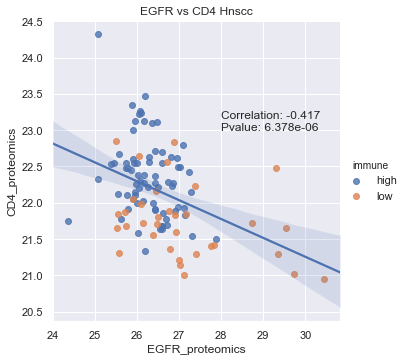

In [43]:
df1 = hn.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","CD4","PLAU"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = hn.get_derived_molecular()
subtype['immune'] = np.where(subtype['immune_proportion'] > 0.15, "high","low")
subtype = subtype[["immune"]]

#ubtype = subtype.rename(columns={"mRNA.Expression.Subtype.TCGA": "TCGA_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","CD4_proteomics", "immune",title = "EGFR vs CD4 Hnscc", ra_stats = True,x_coor = 28, y_coor=23, show_plot = True)

In [38]:

s

In [39]:
subtype

Name,CDKN2A_mutation,CSMD3_mutation,DNAH5_mutation,EGFR_pathway,ESTIMATE_immune_score,ESTIMATE_stromal_score,FAT1_mutation,Hypoxia_pathway,JAK.STAT_pathway,KMT2D_mutation,MAPK_pathway,NAT_pathology_review,NFkB_pathway,NOTCH1_mutation,PI3K_pathway,TGFb_pathway,TNFa_pathway,TP53_mutation,Trail_pathway,VEGF_pathway,chr_instability_idx,fibroblast_proportion,immune_proportion,muscle_proportion,mutation_count,normal_epithelial_proportion,p53_pathway,stemness_score,transcriptomic_subtype,tumor_pathology_review,tumor_proportion,immune
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00977,0,1,1,0.911153,7989.115925,6825.995755,0,-0.471627,0.156291,0,0.728016,Soft Tissue No EPI%,-0.280471,0,1.053002,0.163961,0.090671,1,0.383120,1.030778,2.786782,0.000000e+00,0.333010,1.187015e-01,106,4.788805e-02,0.172796,0.953243,Mesenchymal,SCC 80%,0.500400,high
C3L-00987,0,0,0,-0.841256,4772.409716,5999.793467,0,0.435322,-2.095613,1,-0.230589,Soft Tissue No EPI;Normal No EPI%,-2.231904,0,-0.909516,0.442261,-2.309985,1,-1.288882,-0.201382,5.352115,NaN,NaN,NaN,83,NaN,-0.958467,0.825330,Classical,SCC 90%;SCC 90%;SCC 80%;SCC 70%,NaN,low
C3L-00994,0,0,1,-0.177897,8176.233903,8924.036564,0,-0.384437,0.550595,0,-0.058656,Normal EPI 10%;Normal EPI 10%%,0.553997,0,-0.186746,2.122224,0.329655,1,1.398885,0.446703,2.291782,7.726763e-03,0.266937,3.712125e-01,67,9.979053e-19,-1.554468,0.664581,Mesenchymal,SCC 40%;SCC 70%;SCC 40%;SCC 75%,0.354124,high
C3L-00995,0,0,1,0.072605,8342.246345,8723.429667,0,0.135254,-0.699944,0,-0.858004,Normal 15%;Normal 10%%,0.278294,0,0.413709,1.194100,1.081907,1,-0.525787,-0.129326,2.189810,5.026266e-02,0.347201,2.542939e-01,64,-6.674916e-19,0.143722,0.539918,Mesenchymal,SCC 90%;SCC 80%;SCC 40%;SCC 70%,0.348242,high
C3L-00997,0,0,0,0.815111,7445.251991,7025.911695,0,0.851369,0.193006,0,1.010800,Normal 10%%,0.219070,1,1.235615,0.040276,0.326655,1,0.642277,0.565578,3.949659,1.844718e-02,0.133582,1.055348e-01,129,2.576587e-01,-0.264763,0.843765,Classical,SCC 70%;SCC 70%,0.484778,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,0,0,0,-0.358336,8589.873314,7772.142353,1,-0.299913,0.364821,0,-0.267816,N 30%%,0.136716,0,-0.050981,0.746249,0.089470,1,0.643050,-0.799726,1.641052,3.478365e-02,0.292500,1.975360e-01,112,4.095374e-02,0.212039,0.575173,Mesenchymal,SCC 75%,0.434227,high
C3N-04278,1,1,0,-0.160308,7074.622965,6713.956510,1,-0.186784,-0.993789,0,-0.176368,N 25%%,-0.698748,0,-0.704322,-0.194625,-1.284371,1,0.622237,-0.866063,4.575309,1.055306e-18,0.173015,8.075840e-02,289,2.939234e-01,-1.075612,0.831637,Classical,PD 70%,0.452303,high
C3N-04279,0,0,0,1.305191,5469.762929,4913.198110,0,1.152412,0.218958,0,0.989251,N 20%%,0.688972,0,3.074425,0.201057,0.886492,1,-0.820320,1.997558,5.312774,-2.637730e-19,0.000000,-5.713636e-19,183,7.159701e-02,0.019352,0.862529,Classical,PDCa 70%,0.928403,low


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 171 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


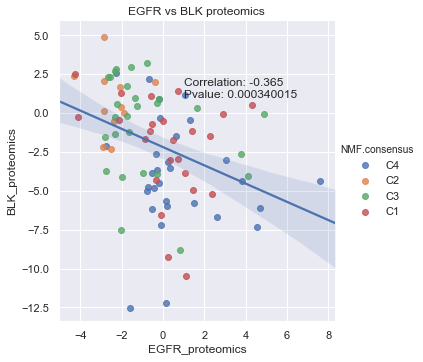

In [8]:
df1 = l.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["BLK","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = l.get_derived_molecular()
subtype = subtype[["NMF.consensus"]]
subtype
#subtype = subtype.rename(columns={"rna_wang_cancer_cell_2017": "GBM_Subtype"})
merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","BLK_proteomics", "NMF.consensus",title = "EGFR vs BLK proteomics", ra_stats = True, show_plot = True)

In [32]:
pd.set_option('display.max_columns', None)
hn.get_derived_molecular()

Name,CDKN2A_mutation,CSMD3_mutation,DNAH5_mutation,EGFR_pathway,ESTIMATE_immune_score,ESTIMATE_stromal_score,FAT1_mutation,Hypoxia_pathway,JAK.STAT_pathway,KMT2D_mutation,MAPK_pathway,NAT_pathology_review,NFkB_pathway,NOTCH1_mutation,PI3K_pathway,TGFb_pathway,TNFa_pathway,TP53_mutation,Trail_pathway,VEGF_pathway,chr_instability_idx,fibroblast_proportion,immune_proportion,muscle_proportion,mutation_count,normal_epithelial_proportion,p53_pathway,stemness_score,transcriptomic_subtype,tumor_pathology_review,tumor_proportion
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00977,0,1,1,0.911153,7989.115925,6825.995755,0,-0.471627,0.156291,0,0.728016,Soft Tissue No EPI%,-0.280471,0,1.053002,0.163961,0.090671,1,0.383120,1.030778,2.786782,0.000000e+00,0.333010,1.187015e-01,106,4.788805e-02,0.172796,0.953243,Mesenchymal,SCC 80%,0.500400
C3L-00987,0,0,0,-0.841256,4772.409716,5999.793467,0,0.435322,-2.095613,1,-0.230589,Soft Tissue No EPI;Normal No EPI%,-2.231904,0,-0.909516,0.442261,-2.309985,1,-1.288882,-0.201382,5.352115,NaN,NaN,NaN,83,NaN,-0.958467,0.825330,Classical,SCC 90%;SCC 90%;SCC 80%;SCC 70%,NaN
C3L-00994,0,0,1,-0.177897,8176.233903,8924.036564,0,-0.384437,0.550595,0,-0.058656,Normal EPI 10%;Normal EPI 10%%,0.553997,0,-0.186746,2.122224,0.329655,1,1.398885,0.446703,2.291782,7.726763e-03,0.266937,3.712125e-01,67,9.979053e-19,-1.554468,0.664581,Mesenchymal,SCC 40%;SCC 70%;SCC 40%;SCC 75%,0.354124
C3L-00995,0,0,1,0.072605,8342.246345,8723.429667,0,0.135254,-0.699944,0,-0.858004,Normal 15%;Normal 10%%,0.278294,0,0.413709,1.194100,1.081907,1,-0.525787,-0.129326,2.189810,5.026266e-02,0.347201,2.542939e-01,64,-6.674916e-19,0.143722,0.539918,Mesenchymal,SCC 90%;SCC 80%;SCC 40%;SCC 70%,0.348242
C3L-00997,0,0,0,0.815111,7445.251991,7025.911695,0,0.851369,0.193006,0,1.010800,Normal 10%%,0.219070,1,1.235615,0.040276,0.326655,1,0.642277,0.565578,3.949659,1.844718e-02,0.133582,1.055348e-01,129,2.576587e-01,-0.264763,0.843765,Classical,SCC 70%;SCC 70%,0.484778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,0,0,0,-0.358336,8589.873314,7772.142353,1,-0.299913,0.364821,0,-0.267816,N 30%%,0.136716,0,-0.050981,0.746249,0.089470,1,0.643050,-0.799726,1.641052,3.478365e-02,0.292500,1.975360e-01,112,4.095374e-02,0.212039,0.575173,Mesenchymal,SCC 75%,0.434227
C3N-04278,1,1,0,-0.160308,7074.622965,6713.956510,1,-0.186784,-0.993789,0,-0.176368,N 25%%,-0.698748,0,-0.704322,-0.194625,-1.284371,1,0.622237,-0.866063,4.575309,1.055306e-18,0.173015,8.075840e-02,289,2.939234e-01,-1.075612,0.831637,Classical,PD 70%,0.452303
C3N-04279,0,0,0,1.305191,5469.762929,4913.198110,0,1.152412,0.218958,0,0.989251,N 20%%,0.688972,0,3.074425,0.201057,0.886492,1,-0.820320,1.997558,5.312774,-2.637730e-19,0.000000,-5.713636e-19,183,7.159701e-02,0.019352,0.862529,Classical,PDCa 70%,0.928403


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


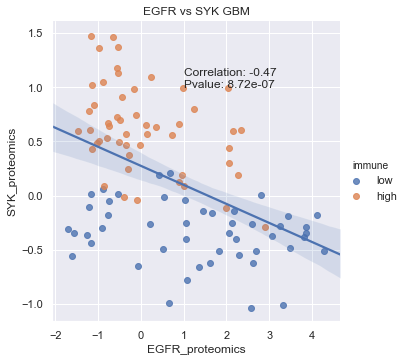

In [30]:
df1 = g.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["F2R","EGFR","SOX2","SYK","BTK"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
subtype = g.get_derived_molecular()
subtype = subtype[["immune"]]

merged = pd.merge(df1, subtype, on = "Patient_ID", how = "outer")
plot_lin_regression(merged,"EGFR_proteomics","SYK_proteomics", "immune",title = "EGFR vs SYK GBM", ra_stats = True, show_plot = True)